# Capstone Three: Data Wrangling and EDA [Step 2]
## By Morgan Snellgrove 

### Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is considered a key indicator of human progress.
The UN desires that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to the notion of child mortality is maternal mortality. This accounts for 295,000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of these things, Cardiotocograms (CTGs) are a simple and cost affective option to assess fetal health. This would allow healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more. Building a machine learning model that can take in features derived from a CTG and predict fetal health would help medical staff process more CTGs at a faster pace. This would be esspecially helpful in areas where medical personale are limited in number. 

### The Data

This dataset contains 2126 records of features extracted from Cardiotocogram exams. These were then classified by three expert obstetritians into 3 classes: Normal, Suspect, and Pathological.

### Feature Columns in Data

1) **'baseline value'**- FHR baseline (beats per minute)
2) **'accelerations'**- Number of accelerations per second
3) **'fetal_movement'**- Number of fetal movements per second
4) **'uterine_contractions'**- Number of uterine contractions per second
5) **'light_decelerations'**- Number of light decelerations per second
6) **'severe_decelerations'**- Number of severe decelerations per second
7) **'prolongued_decelerations'**- Number of prolonged decelerations per second
8) **'abnormal_short_term_variability'**- Percentage of time with abnormal short term variability
9) **'mean_value_of_short_term_variability'**- Mean value of short term variability
10) **'percentage_of_time_with_abnormal_long_term_variability'**- Percentage of time with abnormal long term variability
11) **'mean_value_of_long_term_variability'**- Mean value of long term variability
12) **'histogram_width'**- Width of FHR histogram
13) **'histogram_min'**- Minimum (low frequency) of FHR histogram
14) **'histogram_max'**- Maximum (high frequency) of FHR histogram
15) **'histogram_number_of_peaks'**- Number of histogram peaks
16) **'histogram_number_of_zeroes'**- Number of histogram zeros
17) **'histogram_mode'**- Histogram mode
18) **'histogram_mean'**- Histogram mean
19) **'histogram_median'**- Histogram median
20) **'histogram_variance'**- Histogram variance
21) **'histogram_tendency'**- Histogram tendency

### Target Column

22) **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

### Terminolgy

See article: https://geekymedics.com/how-to-read-a-ctg/

The following terminolgy is helpful for understanding the data. 

Note: On a CTG reading, one square in the grid is equal to one minute. See example output below.

1) **baseline value** = the average heart rate of the fetus within a 10-minute window. Normal fetal heart rate is between 110 - 160 bpm. The fetal heart rate is shown in the top line on the CTG output.

2) **fetal tachycardia** = a baseline fetal heart rate over 160. 

3) **fetal bradycardia** = a baseline fetal heart rate under 110. Sever prolonged bradycardia is fetal heart rate less than 80bpm for over 3 minutes. 

4) **uterine contractions** = Shown on the bottom line in the CTG output. A contraction appears as a peak on this line.  The number of contractions present per 10-minute window is measured. 

5) **duration** = how long a contraction lasts

6) **intensity** = strength of a contraction

7) **variability** = the variation of fetal heart rate from one beat to the next. Normal variability is 5 - 25 bpm. Variability is calculated by assessing how much the peaks and troughs deviate from the baseline rate. 

8) **abnormal variability** = variability of less than 5bpm for 50 minutes, more than 25bpm for 25 minutes, or sinusoidal

9) **accelerations** = abrupt increase in baseline rate of more than 15bpm for longer than 15 seconds. The presence of accelerations is reassuring. Accelerations occuring alongside uterine contractions is an indicator of a healthy fetus. 

10) **decelerations** = abrupt decrease in baseline rate of more than 15bpm for longer than 15 seconds. When a fetus experiences hypoxic stress (low oxygen) it reduces it's heart rate to maintain myocardial oxygenation (oxygen needed by the heart) and perfusion (sending blood/fluid to the rest of the body). When adults experience hypoxic stress, they will breathe deeper and faster to bring in more oxygen. A fetus cannot do this so they adjust their heart rate instead. 

11) **early decelerations** = a deceleration that starts when a uterine contraction begins and recovers when the contraction stops. This is due to increased pressure from the contraction. This type is considered physiological and not pathological.

12) **variable decelerations** = a rapid fall in baseline rate with a variable recovery. Duration varies and they may not be associated with contractions. Common during labor. The presence of persistent variable decelerations indicates the need for close monitoring.

13) **late decelerations** = begin at the peak of the uterine contraction and recover after the contraction ends. This type of deceleration indicates there is insufficient blood flow to the uterus and placenta. As a result, blood flow to the fetus is significantly reduced causing fetal hypoxia and acidosis.

14) **prolonged deceleration** = a deceleration that lasts more than 2 minutes. If it lasts longer than 3 minutes it is immediately classed as abnormal.

15) **sinusoidal pattern** = heart rate line looks like a sine wave. Very rare, but very concerning. It is identified by several factors, one being 0 variability. 

Note: All fetuses experience stress during the labour process, as a result of uterine contractions reducing fetal perfusion. Whilst fetal stress is to be expected during labour, the challenge is to pick up pathological fetal distress.

### Interpretation of Categories

Category 1 = Normal means:
1) Baseline Heart Rate = 110 - 160bpm
2) Variability = 5 - 25bpm
3) Decelerations = None or early; Variable decelerations with no concerning characteristics for less than 90 minutes

Category 2 = Suspect means:
1) Baseline Heart Rate = 100 - 109bpm OR 161 - 180bpm
2) Variability < 5 for 30 - 50 minutes OR Variability > 25 for 15 - 25 minutes
3) Decelerations = Variable decelerations with no concerning characteristics for 90 minutes or more. OR Late Decelerations

Category 3 = Pathological means: 
1) Baseline Heart Rate < 100bpm OR Baseline Heart Rate > 180bpm
2) Variability < 5 for more than 50 minutes OR Variability > 25 for more than 25 minutes OR Sinusoidal Variability = 0
3) Decelerations = Variable decelerations with concerning characteristics. OR Late Decelerations for 30 minutes. OR Acute bradycardia (a single prolonged deceleration lasting 3 minutes or more). 

### Example CTG output

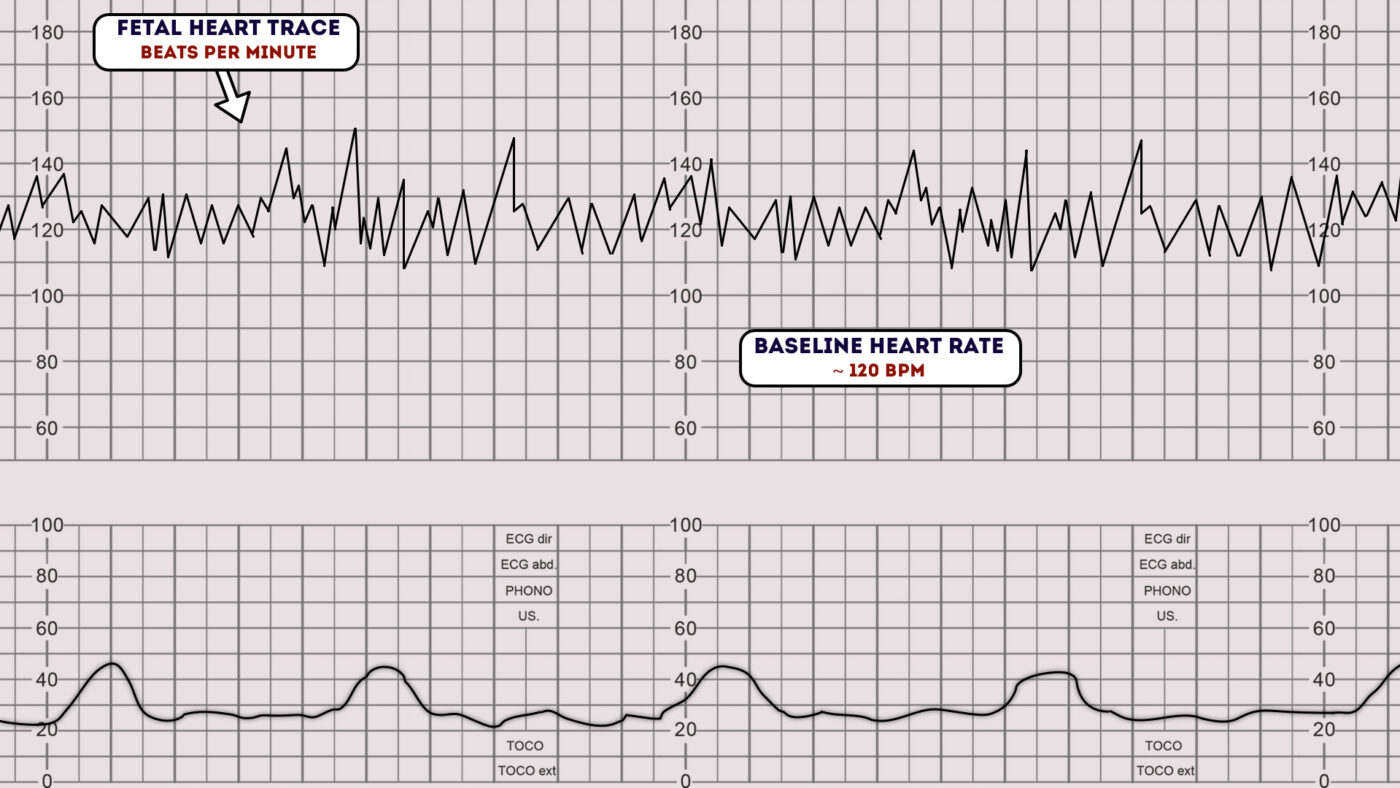

### Importing Data and Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('fetal_health.csv')
data.head().transpose()

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [5]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Class Imbalance

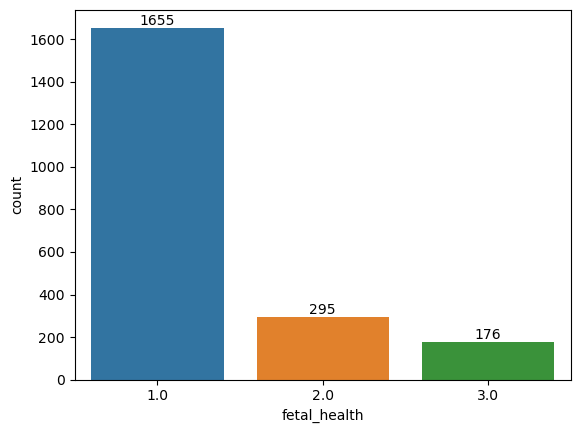

In [6]:
#Looking at imbalance of classes.
ax = sns.countplot(x = 'fetal_health', data = data)
ax.bar_label(ax.containers[0]);

### The classes are imbalanced. 

Roughly 78% are classified as 1, 14% as 2, and 8% as 3.

### Looking at the distributions for each column

/var/folders/mw/tgvznz1d6xbdcgxt0rkwdh540000gn/T/ipykernel_98752/373668584.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


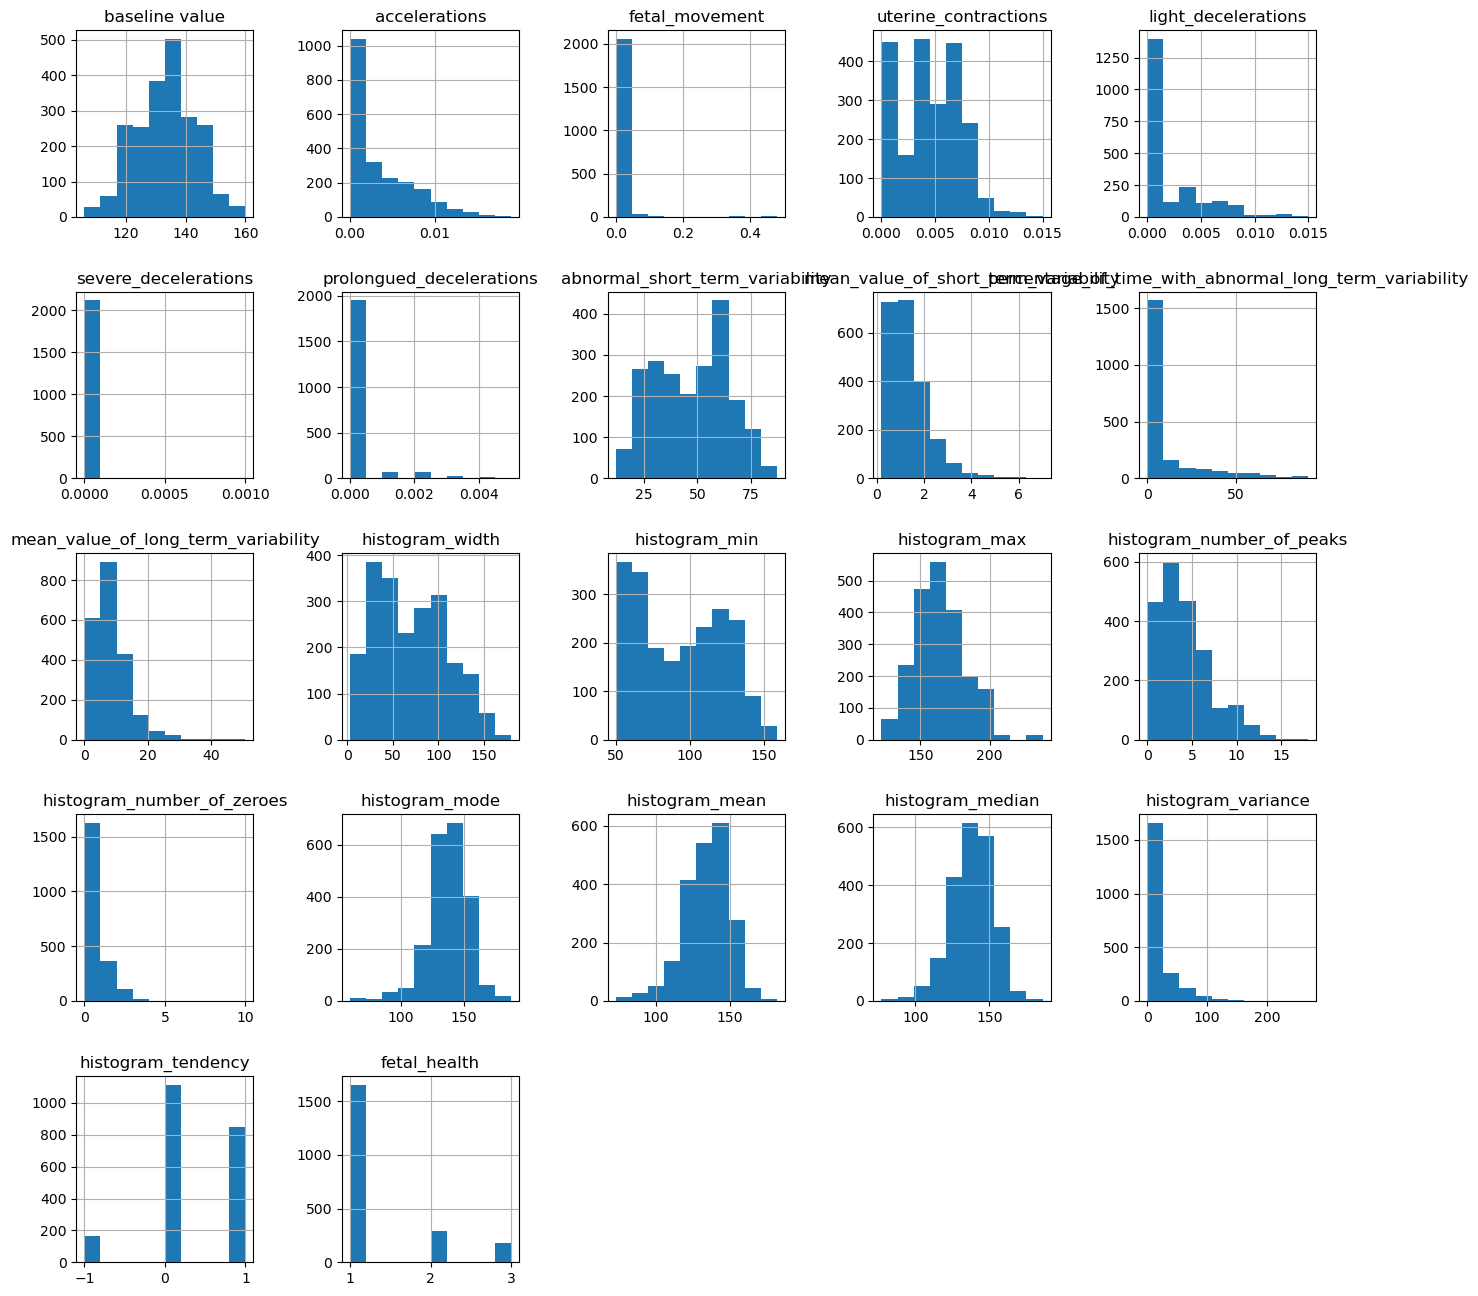

In [7]:
fig, ax = plt.subplots(figsize = (16,16))
data.hist(ax = ax)
plt.subplots_adjust(wspace = 0.5, hspace=0.4);

### Correlation Heat Map 

Of note: 

1) There is a very high negative correlation (-0.9) between the features histogram_width and histogram_min. 

2) There is also very strong positive correlation between the features histogram_mode, histogram_mean, and histogram_median.

3) None of the features demonstrate very strong correlation with the target, fetal_health. 


4) The highest positive correlation with the target is with prolonged_decelerations, abnormal_short_term_variability, and percentage_of_time_with_abnormal_long_term_variability. 


5) The strongest negative correlation with the target is with accelerations. (Recall: the presence of accelerations was reassuring.) There is moderate negative correlation with uterine_contractions, mean_value_of_long_term_variability, histogram_mode, histogram_mean, and histogram_median. 

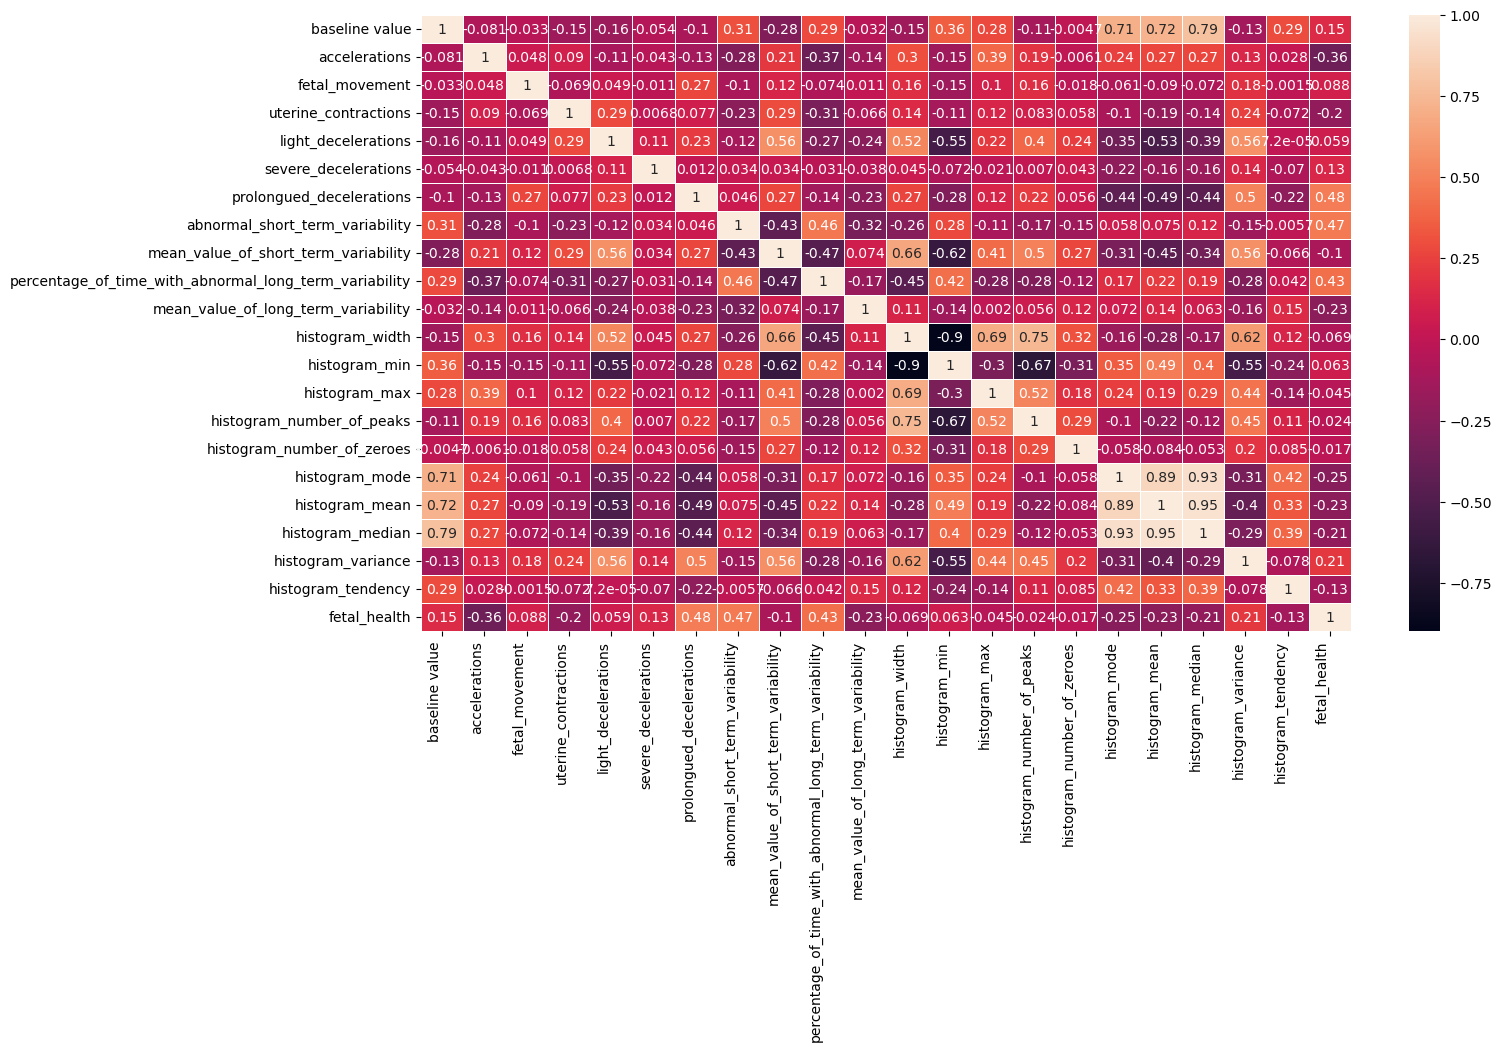

In [8]:
corr_mat = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_mat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=90, horizontalalignment= 'right')
plt.show()

### Closer look the columns with some correlation with the target:

In [9]:
#Subsetting for the columns that showed some correlation with the target:
pos_cor = ['prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability']
neg_cor = ['accelerations', 'uterine_contractions', 'mean_value_of_long_term_variability', 'histogram_mode', 'histogram_mean', 'histogram_median']

In [10]:
cor = pos_cor + neg_cor
for col in cor:
    print(col)
    print(data[col].groupby(data.fetal_health).agg(['mean', 'std', 'min', 'max']))
    print('______________________________________________________')

prolongued_decelerations
                  mean       std  min    max
fetal_health                                
1.0           0.000051  0.000263  0.0  0.003
2.0           0.000095  0.000442  0.0  0.003
3.0           0.001273  0.001371  0.0  0.005
______________________________________________________
abnormal_short_term_variability
                   mean        std   min   max
fetal_health                                  
1.0           42.465861  15.497354  12.0  83.0
2.0           61.901695  11.761252  18.0  79.0
3.0           64.539773  14.452231  18.0  87.0
______________________________________________________
percentage_of_time_with_abnormal_long_term_variability
                   mean        std  min   max
fetal_health                                 
1.0            5.044713  11.526078  0.0  73.0
2.0           29.030508  20.265309  0.0  68.0
3.0           22.846591  33.995702  0.0  91.0
______________________________________________________
accelerations
                  m

## Closer Look at the variables with positive correlation with the target.

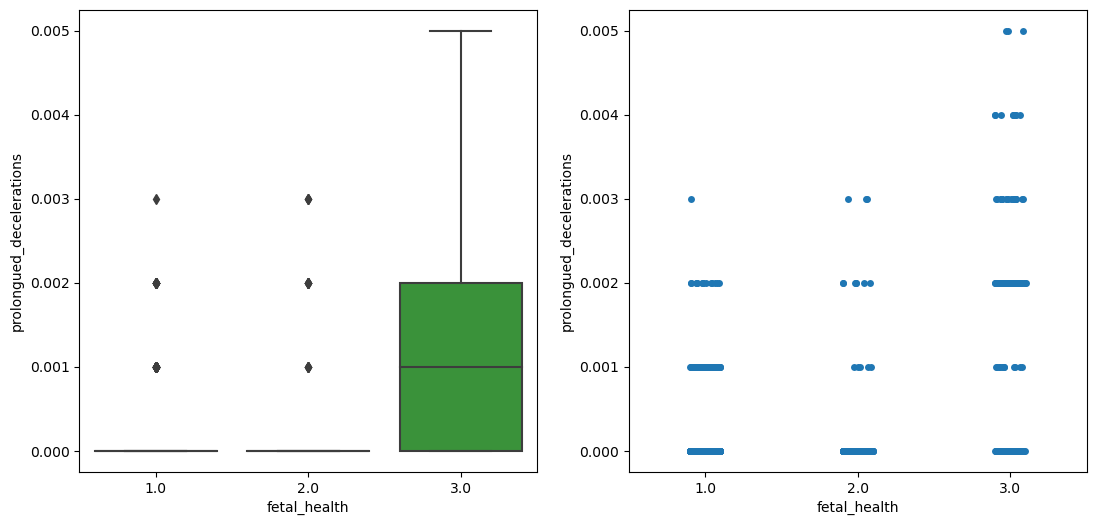

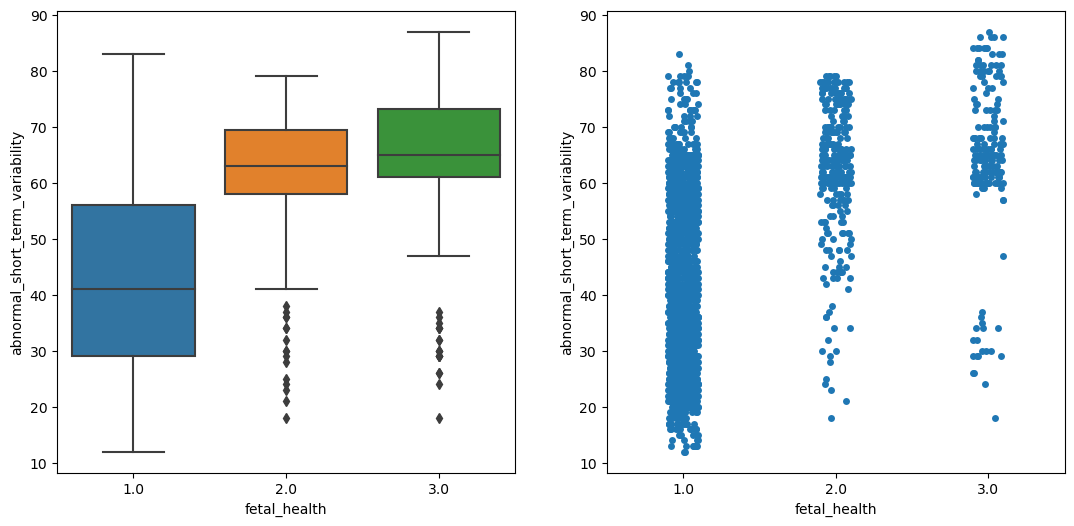

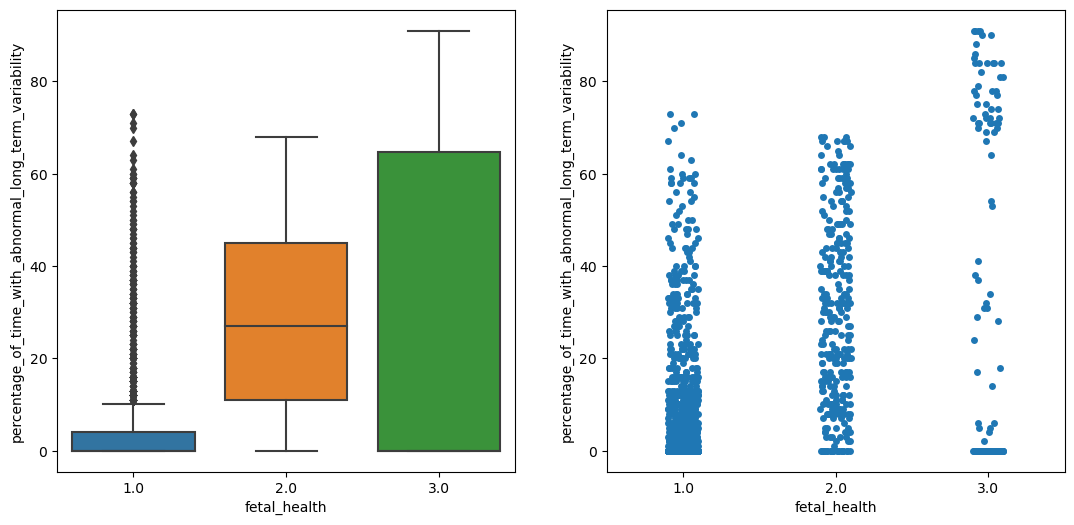

In [11]:
for col in pos_cor:
    fig, ax = plt.subplots(1, 2, figsize = (13, 6))
    sns.boxplot(x = 'fetal_health', y = col, data = data, ax = ax[0])
    sns.stripplot(x = 'fetal_health', y = col, data = data, ax = ax[1])
    plt.show()

### Observations

+ prolongued decelerations are much more present in class 3. 

+ Looking at abnormal short term variability , we see the IQRs for classes 2 and 3 are smaller and positioned higher up. Both classes 2 and 3 are showing outliers on the low end. 

+ Then percentage of time abnormal long term variability: We see most of the class 1 observations are close to 0. Class 3 has the largest spread and the largest IQR. The median lines are not visible for classes 1 and 3... they must be equal to either Q1 and Q3. 

## Now let's look at the features that showed negative correlation with the target:

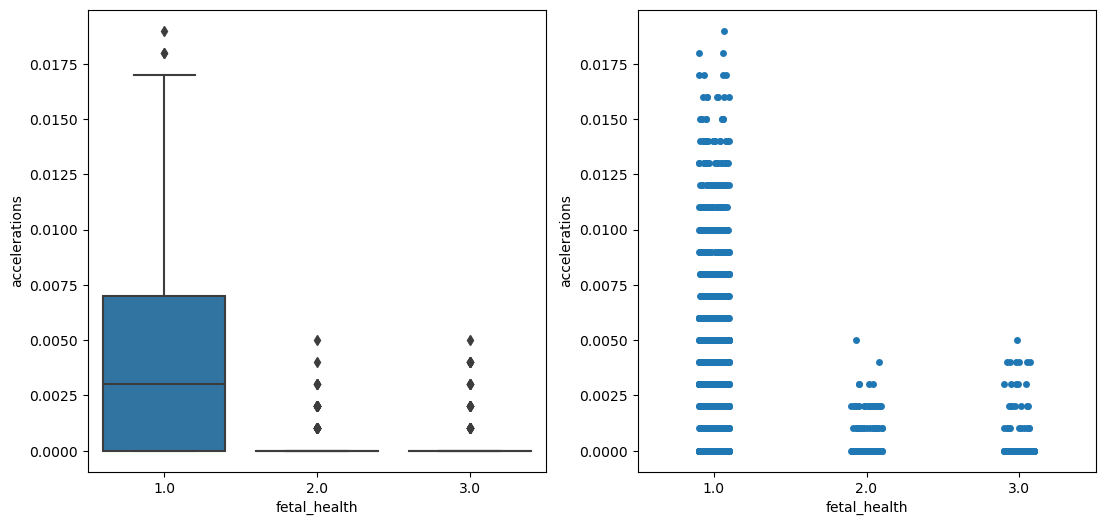

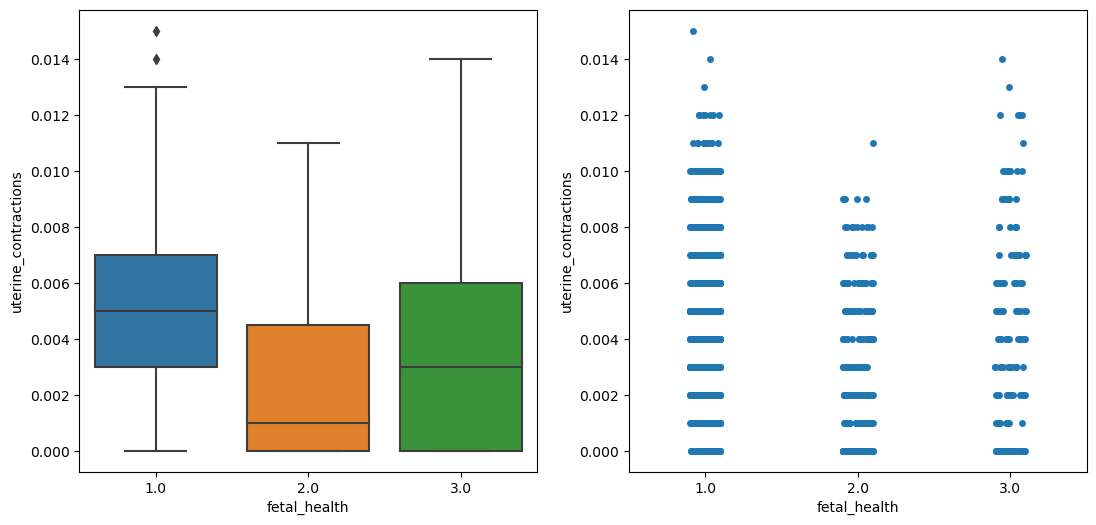

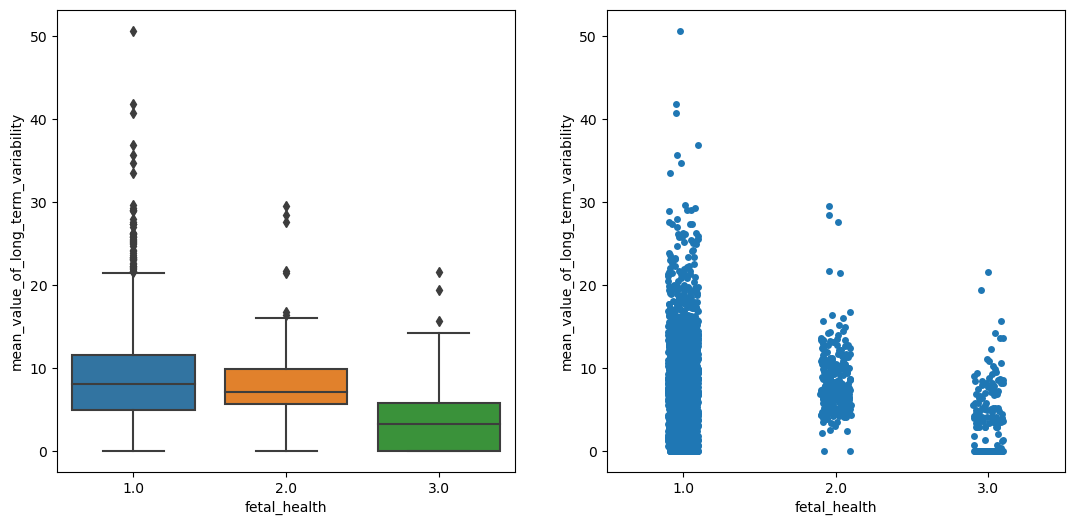

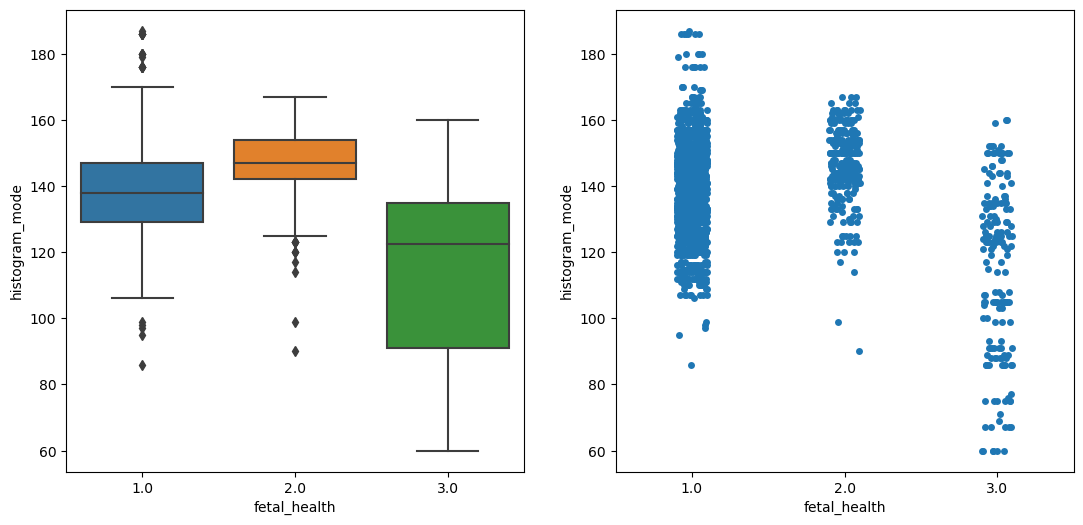

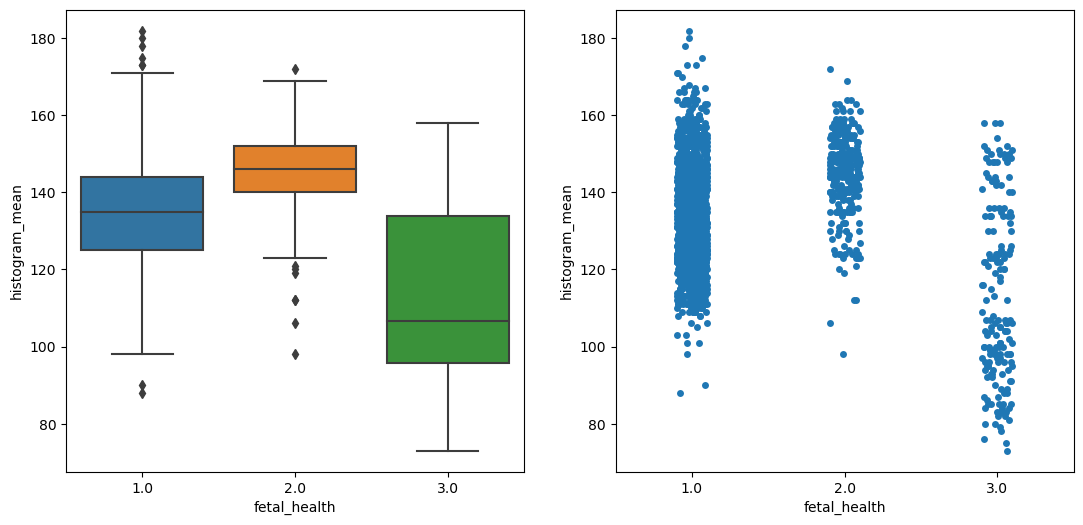

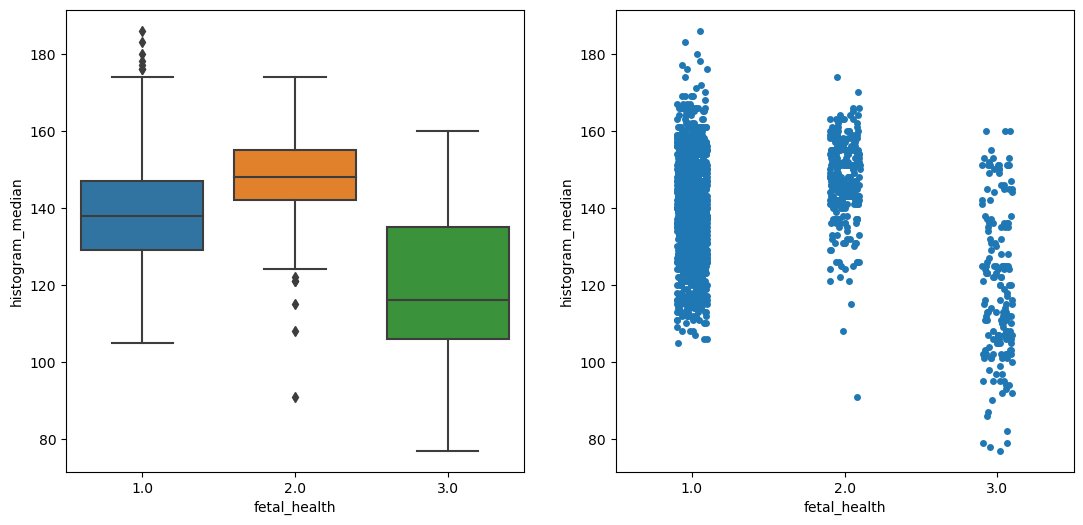

In [12]:
for col in neg_cor:
    fig, ax = plt.subplots(1, 2, figsize = (13, 6))
    sns.boxplot(x = 'fetal_health', y = col, data = data, ax = ax[0])
    sns.stripplot(x = 'fetal_health', y = col, data = data, ax = ax[1])
    plt.show()

## Observations

+ We know the presence of accelerations is a sign of good fetal health. This is also demonstrated in the data. Class 1 has the most accelerations present. 

+ The mean value of long term variability: Recall that good variability is 5-25. Class 1 has the largest range of values, but most are between 0 and 20. The mean values step down as we go to class 2 and again in class 3. Less variability is bad. 

+ The histogram is of the fetal heartrate readings. The means, medians, and modes all have very similar plots for each class. All of these have very high correlation with each other. Maybe choose one to keep and drop the other two.
>+ The measures for class 1 are pretty tight together, with the vast majority falling between 110 and 160.  
>+ The measures for class 2 are grouped inside the higher end of that range, between 135 and 160. 
>+ The measures for class 3 are very spread out and range from below 80 up to 160. 
